# Kasra Mojallal 9631419

In [5]:
import pandas as pd
import numpy as np
import random
import math
from colorama import Fore, Style
import matplotlib.pyplot as plt

First we start by reading from the datasets and putting them into the dataframs.

In [6]:
file_list = ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv']
data_frames = []
dimentions = []

for i in range(len(file_list)):

    data_frames.append(pd.read_csv(file_list[i], header=None))
    dimentions.append(len(data_frames[i].columns))


Here we will define our functions. It is described in the inner comments.

In [7]:
# In this function I create some random centroids based on the values of the data sets.
def create_random_centroids(given_K, your_dimentions):
    
    temp_centroids = []

    for i in range(given_K):
        rand_centroid = []
        for j in range(your_dimentions):
            rand_centroid.append(random.randint(200, 300))
        temp_centroids.append(rand_centroid)

    return temp_centroids

# In this function I calculate the belongings to each cluster and try to find the best centroids.
def calculate_centroids(arr_data, given_K, my_clusters, given_dimention, given_m):
    for i in range(100):
        arr_belongs = []

        for value in arr_data:
            belong = []

            for i in range(given_K):
                value_sum = 0
                for j in range(given_K):
                    value_sum += (math.dist(value, my_clusters[i]) / math.dist(value, my_clusters[j])) ** (2 / (given_m - 1))

                belong.append(1 / value_sum)

            arr_belongs.append(belong)
            
        sum_belongs = [0 for i in range(given_K)]
        for value in arr_belongs:
            for i in range(given_K):
                sum_belongs[i] += (value[i]) ** given_m
                
                
        for i in range(given_K):
            new_arr = [0 for p in range(given_dimention)]
            for j in range(len(arr_belongs)):
                for k in range(given_dimention):
                    new_arr[k] += ((arr_belongs[j][i]) ** given_m) * arr_data[j][k]

            for t in range(given_dimention):
                new_arr[t] = new_arr[t] / sum_belongs[i]

            my_clusters[i] = new_arr
        
    return my_clusters, arr_belongs

# In this functionn I calculate the cost for a given K
def calculate_cost(arr_data, given_K, my_clusters, my_belongs, given_m):
    cost = 0
    for j in range(len(arr_data)):
        my_sum = 0
        for i in range(given_K):
            my_sum += ((my_belongs[j][i]) ** given_m) * math.dist(arr_data[j], my_clusters[i])

        cost += my_sum

    return cost

I converted the data frames to numpy arrays for better performance

In [8]:
data_arrays = []
for i in range(len(data_frames)):
    data_arrays.append(data_frames[i].to_numpy())

# Dataset 1
### for better understanding the dataset I calculated the centroids and ploted the clusters.

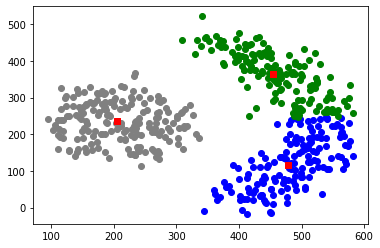

In [9]:
K = 3
m = 1.7

random_centroids1 = create_random_centroids(K, dimentions[0])
centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], K, random_centroids1, dimentions[0], m)
calculate_cost(data_arrays[0], K, centroids1, arr_belongs1, m)

distribution1 = []
data1_dframs = []
distribution1_arrays = [[] for i in range(K)]
for i in range(len(arr_belongs1)):
    distribution1.append(np.argmax(arr_belongs1[i]))
for i in range(len(arr_belongs1)):
    distribution1_arrays[distribution1[i]].append(data_arrays[0][i])
for i in range(len(distribution1_arrays)):
    data1_dframs.append(pd.DataFrame(distribution1_arrays[i]))

df1 = pd.DataFrame(centroids1)
plt.scatter(data1_dframs[0][0], data1_dframs[0][1], color='blue')
plt.scatter(data1_dframs[1][0], data1_dframs[1][1], color='green')
plt.scatter(data1_dframs[2][0], data1_dframs[2][1], color='gray')
plt.scatter(df1[0], df1[1], marker='s', color='red')
plt.show()

# Dataset 3
### for better understanding the dataset I calculated the centroids and ploted the clusters.

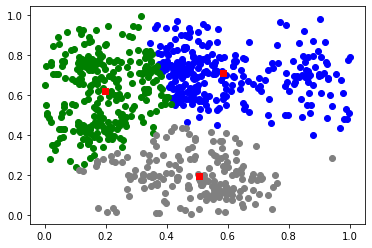

In [10]:
K = 3
m = 1.7

random_centroids3 = create_random_centroids(K, dimentions[2])
centroids3, arr_belongs3 = calculate_centroids(data_arrays[2], K, random_centroids3, dimentions[2], m)
calculate_cost(data_arrays[2], K, centroids3, arr_belongs3, m)

distribution3 = []
data3_dframs = []
distribution3_arrays = [[] for i in range(K)]
for i in range(len(arr_belongs3)):
    distribution3.append(np.argmax(arr_belongs3[i]))
for i in range(len(arr_belongs3)):
    distribution3_arrays[distribution3[i]].append(data_arrays[2][i])
for i in range(len(distribution3_arrays)):
    data3_dframs.append(pd.DataFrame(distribution3_arrays[i]))

df3 = pd.DataFrame(centroids3)
plt.scatter(data3_dframs[0][0], data3_dframs[0][1], color='blue')
plt.scatter(data3_dframs[1][0], data3_dframs[1][1], color='green')
plt.scatter(data3_dframs[2][0], data3_dframs[2][1], color='gray')
plt.scatter(df3[0], df3[1], marker='s', color='red')
plt.show()

# Costs
#### Here we calculate the costs by changing the K.

## Dataset 1
We can understand that with Elbow function we can see that the best K for this dataset would be 3.

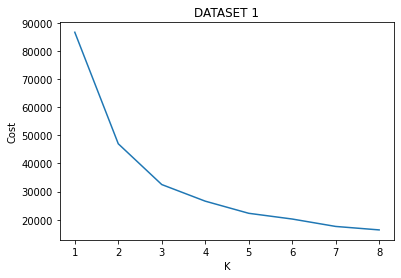

In [12]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8]
costs = []

for i in range(len(k_list)):
    random_centroids1 = create_random_centroids(k_list[i], dimentions[0])
    centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], k_list[i],
                                                   random_centroids1, dimentions[0], m)
    costs.append(calculate_cost(data_arrays[0], k_list[i], centroids1, arr_belongs1, m))
    
plt.plot(k_list, costs)
plt.title('DATASET 1')
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

## Dataset 2
We can understand that with Elbow function we can see that the best K for this dataset would be 4.

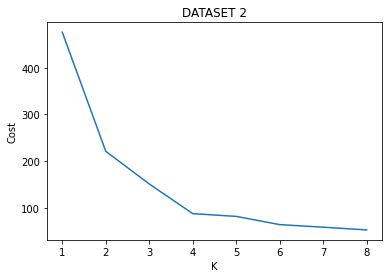

In [13]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8]
costs = []

for i in range(len(k_list)):
    random_centroids2 = create_random_centroids(k_list[i], dimentions[1])
    centroids2, arr_belongs2 = calculate_centroids(data_arrays[1], k_list[i],
                                                   random_centroids2, dimentions[1], m)
    costs.append(calculate_cost(data_arrays[1], k_list[i], centroids2, arr_belongs2, m))
    
plt.plot(k_list, costs)
plt.title('DATASET 2')
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

## Dataset 3
We can understand that with Elbow function we can see that the best K for this dataset would be 4.

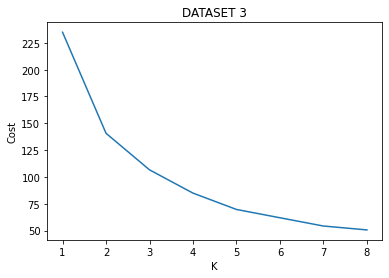

In [14]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8]
costs = []

for i in range(len(k_list)):
    random_centroids3 = create_random_centroids(k_list[i], dimentions[2])
    centroids3, arr_belongs3 = calculate_centroids(data_arrays[2], k_list[i],
                                                   random_centroids3, dimentions[2], m)
    costs.append(calculate_cost(data_arrays[2], k_list[i], centroids3, arr_belongs3, m))
    
plt.plot(k_list, costs)
plt.title('DATASET 3')
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

## Dataset 4
We can understand that with Elbow function we can see that the best K for this dataset would be 3.

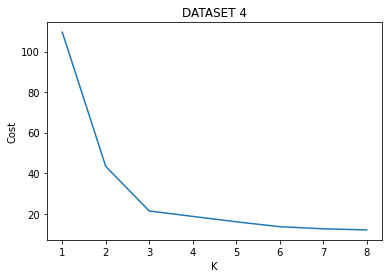

In [15]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8]
costs = []

for i in range(len(k_list)):
    random_centroids4 = create_random_centroids(k_list[i], dimentions[3])
    centroids4, arr_belongs4 = calculate_centroids(data_arrays[3], k_list[i],
                                                   random_centroids4, dimentions[3], m)
    costs.append(calculate_cost(data_arrays[3], k_list[i], centroids4, arr_belongs4, m))
    
plt.plot(k_list, costs)
plt.title('DATASET 4')
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

## Costs by changing the m.
##### We can see that by changing the m, the cost would decrease, since the m is higher and the result of the cost function becomes lower.

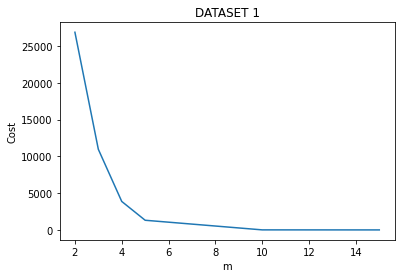

In [18]:
m_list = [2, 3, 4, 5, 10, 15]
k = 3
costs = []

for i in range(len(m_list)):
    random_centroids1 = create_random_centroids(k, dimentions[0])
    centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], k,
                                                   random_centroids1, dimentions[0], m_list[i])
    costs.append(calculate_cost(data_arrays[0], k, centroids1, arr_belongs1, m_list[i]))
    
plt.plot(m_list, costs)
plt.title('DATASET 1')
plt.xlabel('m')
plt.ylabel('Cost')
plt.show()

# Increasing m
#### Here we see that by increasing m, a node does not belong to a single cluster and it will be like it belongs to all clusters by the same value. It is respresented in the following plots. By increasing m we see this happening.

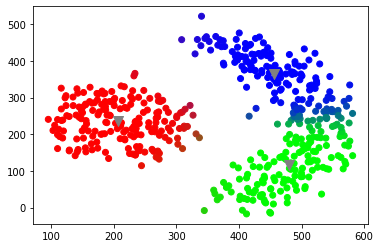

In [49]:
K = 3
m = 1.5

random_centroids1 = create_random_centroids(K, dimentions[0])
centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], K, random_centroids1, dimentions[0], m)

plt.scatter(data_frames[0][0], data_frames[0][1], c = arr_belongs1)
plt.scatter(pd.DataFrame(centroids1)[0], pd.DataFrame(centroids1)[1], marker='v',s = 100, color='gray')
plt.show()

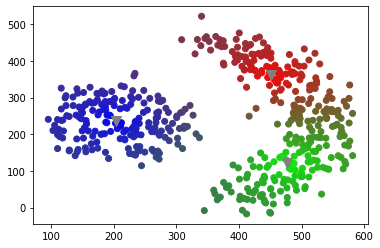

In [50]:
K = 3
m = 3

random_centroids1 = create_random_centroids(K, dimentions[0])
centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], K, random_centroids1, dimentions[0], m)

plt.scatter(data_frames[0][0], data_frames[0][1], c = arr_belongs1)
plt.scatter(pd.DataFrame(centroids1)[0], pd.DataFrame(centroids1)[1], marker='v',s = 100, color='gray')
plt.show()

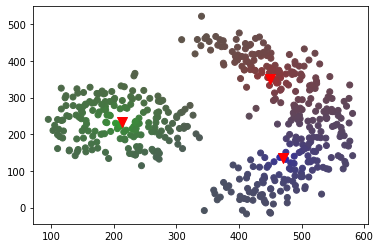

In [54]:
K = 3
m = 7

random_centroids1 = create_random_centroids(K, dimentions[0])
centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], K, random_centroids1, dimentions[0], m)

plt.scatter(data_frames[0][0], data_frames[0][1], c = arr_belongs1)
plt.scatter(pd.DataFrame(centroids1)[0], pd.DataFrame(centroids1)[1], marker='v',s = 100, color='red')
plt.show()

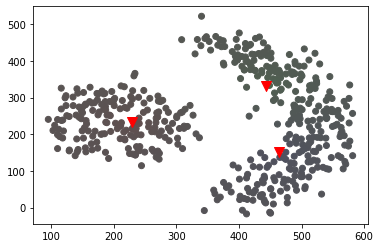

In [53]:
K = 3
m = 30

random_centroids1 = create_random_centroids(K, dimentions[0])
centroids1, arr_belongs1 = calculate_centroids(data_arrays[0], K, random_centroids1, dimentions[0], m)

plt.scatter(data_frames[0][0], data_frames[0][1], c = arr_belongs1)
plt.scatter(pd.DataFrame(centroids1)[0], pd.DataFrame(centroids1)[1], marker='v',s = 100, color='red')
plt.show()